# Library Imports

In [1]:
# To install basemap, run "conda install basemap" on terminal
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import csv
from settings import *

%matplotlib inline
rcParams['figure.figsize'] = (8,6)

# Military Aid by Impact (more impact, darker color)

** Parsing the Data **

In [2]:
tone = []
lats2, lons2 = [], []

with open(MILITARY_AID_AVGTONE) as f:
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        lats2.append(float(row[6]))
        lons2.append(float(row[7]))
        tone.append(float(row[8]))


** Drawing the Map **

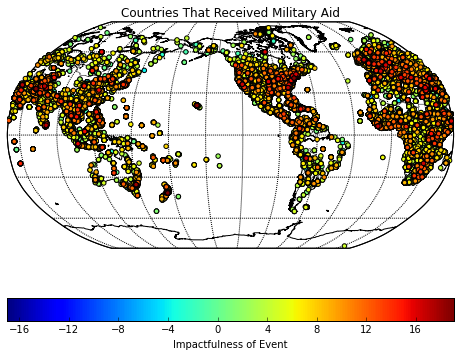

In [10]:
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray', zorder=0)
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))


x,y = eq_map(lons2, lats2)
eq_map.scatter(x, y, c=tone, zorder=4)
#for i in range(len(idx)):
#    x,y = eq_map(lons2[i], lats2[i])
#    eq_map.scatter(x,y,c=float(pltColors[i][0]), label=actors1[i][0], zorder=4)
  
plt.title("Countries That Received Military Aid")
c = plt.colorbar(orientation='horizontal')
c.set_label("Impactfulness of Event")
plt.show()

# Military Aid Received By Country (each color represent a country that gave aid to that plot)

** Parsing the Data**

In [3]:
actors1 = []
lats2, lons2 = [], []

with open(MILITARY_AID) as f:
    reader = csv.reader(f)
    
    # Ignore the header row.
    next(reader)
    
    # Store the latitudes and longitudes in the appropriate lists.
    for row in reader:
        actors1.append(row[1])
        lats2.append(float(row[6]))
        lons2.append(float(row[7]))



** Drawing the Map**

In [4]:
#actors1 = np.array(actors1)
#lons2 = np.array(lons2)
#lats2 = np.array(lats2)
#pltColors = np.array(pltColors)

#actors1 = np.split(actors1, idx)
#lons2 = np.split(lons2, idx)
#lats2 = np.split(lats2, idx)
#pltColors = np.split(pltColors, idx)

In [4]:
pltColors = []
length = len(actors1)
idx = []
color = np.random.randint(0,300)/10.

for i in range(length):
    actor1 = actors1[i]
    if i != 0 and actors1[i-1] != actor1:
        color = np.random.randint(0,300)/10.
        idx.append(i)
    
    pltColors.append(color)

In [5]:
print "Number of countries : "
print len(idx)

Number of countries : 
161


/Users/chongyeegan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


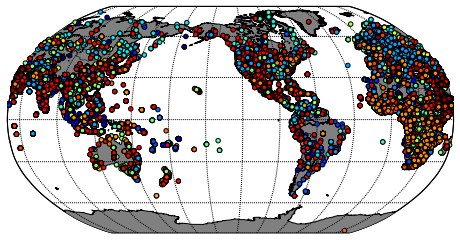

In [4]:
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray', zorder=0)
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))


x,y = eq_map(lons2, lats2)
eq_map.scatter(x,y,c=pltColors, zorder=4)
#for i in range(len(idx)):
#    x,y = eq_map(lons2[i], lats2[i])
#    eq_map.scatter(x,y,c=float(pltColors[i][0]), label=actors1[i][0], zorder=4)
    
plt.show()

In [ ]:
# TRYING TO ADD LEGEND. UNSUCCESSFUL

line = []
line.append(plt.Line2D(range(10), range(10), marker='o', color=pltColors[0]))

for i in idx:
    line.append(plt.Line2D(range(10), range(10), marker='o', color=pltColors[i]))

                
plt.legend(tuple(line),tuple(pltColors),numpoints=1, loc=1)
plt.show()

# Appendix (EXPERIMENTS PERFORMED THAT WERE NOT USUED IN FINAL REPORT. ONLY READ FOR REFERENCE)

By country

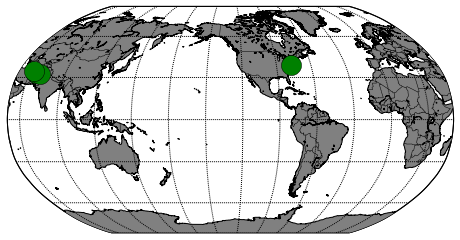

In [5]:
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
    
length = 5
pltColor = 'go'
#length = len(actors1)
for i in range(length):
    actor1 = actors1[i]

    if i != 0 and actors1[i-1] != actor1:
        pltColor = 'bo'
        #color = np.random.rand(3,1)
        #color = (color[0][0], color[1][0], color[2][0])
    
    x,y = eq_map(lons2[i], lats2[i])
    eq_map.plot(x,y,pltColor,markersize=20)
    

plt.show()
#plt.savefig('military_aid.png')

By Frequency

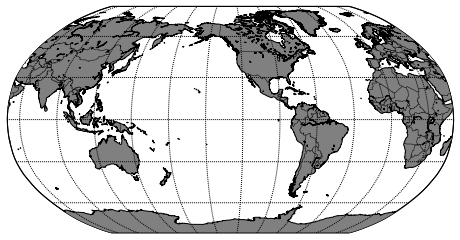

In [49]:
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))
    
length = 10
given = 0
#length = len(actors1)
for i in range(length):
    given += 1
    actor1 = actors1[i]
    
    if i != 0 and actors1[i-1] != actor1:
        given = 1
    
    x,y = eq_map(lons2[i], lats2[i])
    eq_map.plot(x,y,'bo',markersize=1*given)
    

plt.show()
#plt.savefig('military_aid.png')

Earthquake

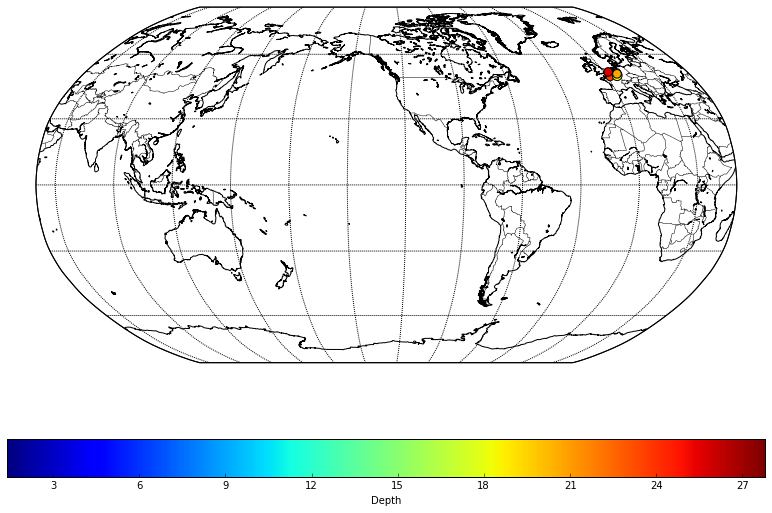

In [11]:
fig = plt.figure(figsize=(11.7,8.3))
 
#Custom adjust of the subplots
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)
 
#Let's create a basemap around Belgium
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color='lightgray',zorder=0)
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

lon = np.random.randint(11,79,10)/10.
lat = np.random.randint(491,519,10)/10.
depth = np.random.randint(0,300,10)/10.
magnitude = np.random.randint(0,100,10)/10.
labels = ["1", '2', '3', '4', '5', '6', '7','8','9','10']
# with x,y=m(lon,lat) we calculate the x,y position of each quake in the map coordinates
x,y = eq_map(lon,lat)
eq_map.scatter(x,y,s=10*magnitude,c=depth, zorder=4)
#eq_map.scatter(x,y,s=10*magnitude,c=depth) # we will scale the dots by 10 time the magnitude
c = plt.colorbar(orientation='horizontal')
c.set_label("Depth")
plt.show()

Zoom In

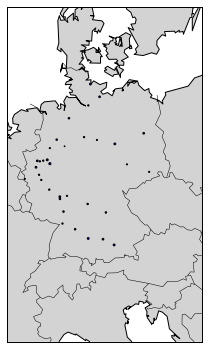

In [8]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np


plt.figure(1)
map = Basemap(projection='merc',
              resolution='l',
              llcrnrlat=44.0,
              llcrnrlon=5.0,
              urcrnrlat=57.0,
              urcrnrlon=17)
map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color='lightgray',zorder=0)
map.drawmapboundary()

long = np.array([ 13.404954,  11.581981,   9.993682,   8.682127,   6.960279,
         6.773456,   9.182932,  12.373075,  13.737262,  11.07675 ,
         7.465298,   7.011555,  12.099147,   9.73201 ,   7.628279,
         8.801694,  10.52677 ,   8.466039,   8.239761,  10.89779 ,
         8.403653,   8.532471,   7.098207,   7.216236,   9.987608,
         7.626135,  11.627624,   6.852038,  10.686559,   8.047179,
         8.247253,   6.083887,   7.588996,   9.953355,  10.122765])

lat = np.array([ 52.520007,  48.135125,  53.551085,  50.110922,  50.937531,
        51.227741,  48.775846,  51.339695,  51.050409,  49.45203 ,
        51.513587,  51.455643,  54.092441,  52.375892,  51.36591 ,
        53.079296,  52.268874,  49.487459,  50.078218,  48.370545,
        49.00689 ,  52.030228,  50.73743 ,  51.481845,  48.401082,
        51.960665,  52.120533,  51.47512 ,  53.865467,  52.279911,
        49.992862,  50.775346,  50.356943,  49.791304,  54.323293])

colors = np.array([ 2.72189792,  3.62138986,  1.7947676 ,  1.36524602,  1.75664228,
        3.0777491 ,  2.39580451,  1.17822874,  1.35503558,  2.28517658,
        3.66472978,  1.76467741,  0.72551119,  1.76997962,  4.49420944,
        2.34434288,  1.3243405 ,  2.35945794,  3.16147488,  2.94025564,
        1.68774158,  0.67602518,  1.60727613,  1.85608281,  3.57769226,
        1.33501838,  3.32549868,  2.95492675,  2.83391381,  2.33983198,
        2.59607424,  1.24260218,  1.89258818,  2.07508363,  3.03319927])

x, y = map(long, lat)
map.scatter(x,y,colors, zorder=4)
plt.show()